In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#Pas comme ça mais intéressant quand même
#def encodage(dataframe):
#    mapping={} #dictionnaire qui va contenir les chaînes de caractères et l'encodage correspondant
#    for column in dataframe.columns: #column est l'étiquette de la colonne (columns renvoie un tableau d'étiquettes de colonnes)

        #Déterminer les différentes modalités non numériques à encoder
#        if pd.api.types.is_categorical_dtype(dataframe[column]):
#            liste_modalites=dataframe[column].unique() #unique() renvoie un tableau numpy contenant les différents modalités
#            for i,modalite in enumerate(liste_modalites): #enumerate renvoie un objet de type enumerable qui contient des tuples (indice,valeur)
#                mapping[modalite]=i

#            dataframe[column]=dataframe[column].replace(mapping) #Encoder les modalités non numériques
    

In [12]:
def encodage(df):
    df_encoded = df.copy()
    s = (df.dtypes == 'object')
    object_cols = list(s[s].index)
    ordinal_encoder = OrdinalEncoder()
    df_encoded[object_cols]=ordinal_encoder.fit_transform(df[object_cols])    #On peut passer à des dataframes des listes de colonnes :)
    return df_encoded

def imputation(df):
    my_imputer = SimpleImputer()
    df_imputed = pd.DataFrame(my_imputer.fit_transform(df), columns=df.columns) #Ici, on utilise pd.DataFrame(...,columns=df.columns) car l'imputateur renvoie un tableau numpy (sans les titres des colonnes) et pas un dataFrame
    return df_imputed  

In [13]:
pd.set_option('display.max_columns',None)
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
X_train,y_true_train=train.drop(['SalePrice'],axis=1),train['SalePrice']
X_train,X_test=train_test_split(X_train,test_size=0.2,random_state=2)
y_true_train,y_true_test=train_test_split(y_true_train,test_size=0.2,random_state=2)
X_pred=test

#Encodage des modalités non numériques
X_train=encodage(X_train)
X_pred=encodage(X_pred)
X_test=encodage(X_test)
#Imputations des NaN
X_train=imputation(X_train)
X_pred=imputation(X_pred)
X_test=imputation(X_test)

print(X_train)


          Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street     Alley  \
0      456.0        20.0       3.0         80.0   9600.0     1.0  0.459459   
1      864.0        20.0       3.0         70.0   7931.0     1.0  0.459459   
2      505.0       160.0       3.0         24.0   2308.0     1.0  0.459459   
3     1414.0        20.0       3.0         88.0  10994.0     1.0  0.459459   
4     1390.0        50.0       4.0         60.0   6000.0     1.0  0.459459   
...      ...         ...       ...          ...      ...     ...       ...   
1163   467.0        20.0       3.0         85.0  10628.0     1.0  0.459459   
1164   300.0        20.0       3.0         80.0  14000.0     1.0  0.459459   
1165   494.0        20.0       3.0         70.0   7931.0     1.0  0.459459   
1166   528.0        60.0       3.0         67.0  14948.0     1.0  0.459459   
1167  1193.0        50.0       4.0         60.0   9600.0     1.0  0.000000   

      LotShape  LandContour  Utilities  LotConfig  LandSlope  N

In [14]:
random_forest=RandomForestRegressor(n_estimators=10,random_state=10)
random_forest.fit(X_train,y_true_train)


RandomForestRegressor(n_estimators=10, random_state=10)

MAE test 19456.537328767125
MAE training 7529.290239726028
R2 test 0.867312900931478
R2 train 0.9757830336537058


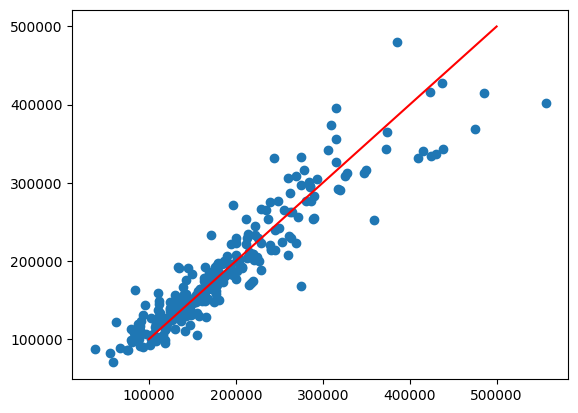

In [15]:
y_test=random_forest.predict(X_test)
y_train=random_forest.predict(X_train)
print("MAE test",mae(y_true_test,y_test))
print("MAE training",mae(y_true_train,y_train))
print("R2 test",r2_score(y_true_test,y_test))
print("R2 train",r2_score(y_true_train,y_train))
plt.plot([100000,200000,300000,400000,500000],[100000,200000,300000,400000,500000],color='r')
plt.scatter(y_true_test,y_test)
plt.show()

Nous obtenons des performances satisfaisantes pour ce premier modèle avec ces hyperparamètres. On a un R2 calculé sur l'échantillon d'apprentissage de 0.97 et un R2 sur l'échantillon de test de 0.87, ils sont les uns des autres, signes d'une bonne capacité du modèle à se généraliser. Le graphe nous montre qu'il n'y a pas de tendances à la sur-estimation ou la sous-estimation. Vérifions si on ne peut pas améliorer les MAE et R2 

In [16]:
#On effectue les prédictions:
y_pred=random_forest.predict(X_pred)
print(y_pred)

[124340.8 155065.  177560.  ... 156160.  128100.  227387.8]


On teste maintenant le modèle de régression linéaire

MAE train: 18122.98146482553
MAE test: 221280.27022637683
R2 test -6.539933048802373
R2 train 0.8619117142381624


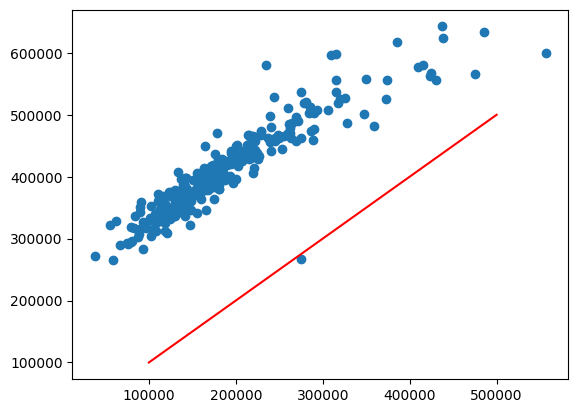

In [19]:
reg_lin=LinearRegression()
reg_lin.fit(X_train,y_true_train)

y_train_mlg=reg_lin.predict(X_train)
y_test_mlg=reg_lin.predict(X_test)
print("MAE train:",mae(y_true_train,y_train_mlg))
print("MAE test:",mae(y_true_test,y_test_mlg))
print("R2 test",r2_score(y_true_test,y_test_mlg))
print("R2 train",r2_score(y_true_train,y_train_mlg))

plt.plot([100000,200000,300000,400000,500000],[100000,200000,300000,400000,500000],color='r')
plt.scatter(y_true_test,y_test_mlg)
plt.show()

MAE test: 606845906133.9385
R2 test: -60798788850426.96
R2 train: -10561523130790.723


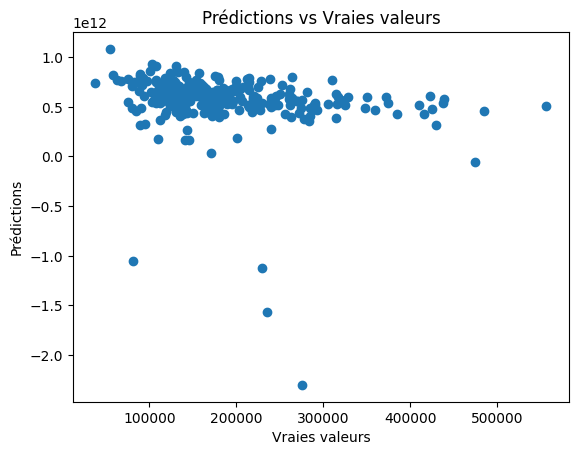

In [18]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer et entraîner le modèle
reg_lin = SGDRegressor(fit_intercept=True, loss="squared_error", learning_rate="constant", eta0=0.01, max_iter=1000, tol=1e-3, random_state=42)
reg_lin.fit(X_train_scaled, y_true_train)

# Faire des prédictions sur l'ensemble de test
y_test_pred = reg_lin.predict(X_test_scaled)
y_train_pred = reg_lin.predict(X_train_scaled)
# Calculer les mesures de performance
mae_test = mean_absolute_error(y_true_test, y_test_pred)
r2_test = r2_score(y_true_test, y_test_pred)
r2_train=r2_score(y_true_train, y_train_pred)
# Afficher les résultats
print("MAE test:", mae_test)
print("R2 test:", r2_test)
print("R2 train:", r2_train)

# Tracer les prédictions par rapport aux vraies valeurs pour l'ensemble de test
plt.scatter(y_true_test, y_test_pred)
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Vraies valeurs')
plt.show()


On teste maintenant le modèle de régression polynomiale